<a href="https://colab.research.google.com/github/00Tafadzwa/Salifort_Project/blob/main/Salifort_Motors_project_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone project: Providing data-driven suggestions for HR**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Description and deliverables

This project is analyzes a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

The deliverables will include the model evaluation (and interpretation if applicable), data visualizations that is directly related to the different questions, ethical considerations.

# **PACE stages**


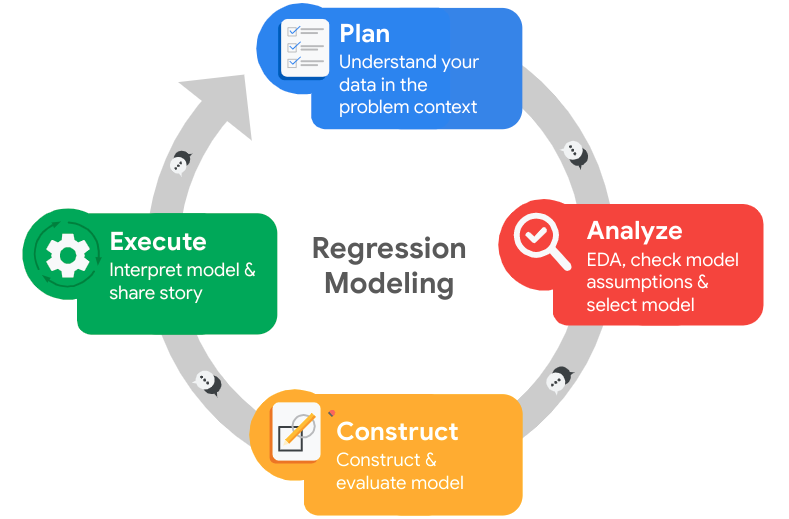

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Answer:**

- The stakeholders for this project is the Leadership of Salifort Motors
- This lab will explore which features have an impact on high turnover rates by using data analysis tools and methods such as Exploratory Data Analysis (EDA), statistical approaches, regression and machine learning models.
- The data has object data types and 10 numeric. The object types are categorical whilst three of the numeric types are descrete values which categorical in nature.
- Numpy and pandas libaries were very useful in completing this first stage of data exploration.
- There seem to be no any ethical considerations in this stage of the project

## Step 1. Imports

*   Import packages
*   Load dataset



### Import operational packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  

In [3]:
# Loading dataset into a dataframe

df0 = pd.read_csv('/content/drive/MyDrive/Capstone Project/Capstone Project Complete/HR_capstone_dataset.csv')


# Displaying first few rows of the dataframe

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understanding the variables in the dataset
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gathering basic information about the data

#Rows and columns of the dataset
df0.shape

(14999, 10)

There are 14999 rows and 10 columns

### Checking the size of the dataset

In [5]:
### Size of the dataset

df0.size

149990

There is a total of 149990 values in the dataset

### Checking data types

In [6]:
### Data types in each column

df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

Two columns; the `Department` and `Salary`, are objects and contains either strings or any characters or are categorical. The nature the values will be discovered shortly below. The rest of the columns contains numerical values.

### Checking values in object data type columns

In [7]:
### Checking unique values in Department

df0['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

Inside the department feature contains the following unique values; `sales`, `accounting`, `hr`, `technical`, `support`, `management`, `IT`, `product_mg`, `marketing`, and `RandD`.

In [8]:
### Checking unique values in Salary

df0['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

The salary feature contains three main values; `low`, `medium`, and `high`

### Gather descriptive statistics about the data

In [9]:
### Descriptive statistics of numeric columns

df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


- It seems we might perform scaling inorder to have our data usable in machine learning models as the average_monthly_hours feature shows values that are out of range with others and the feature measurements are different.
- The maximum number of projects that were handled by a particular employee is seven.

In [10]:
### Descriptive statics of categorical columns

df0[['Department', 'salary']].describe()

,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


- Initial findings shows that in our categorical features, in salary, the low category has the value count representated by 7316.
- The sales department under Department feature contains the highest value counts across all other departments.

### Renaming columns

As a data cleaning step, I will rename the columns as needed by standardizing the column names so that they are all in `snake_case`, and correcting any column names that are misspelled, and make column names more concise as needed.

In [11]:
# Displaying all column names

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [12]:
### Renaming columns

df0 = df0.rename(columns = {"Department": "department",
                            "average_montly_hours": "average_monthly_hours",
                            "Work_accident": "work_accident"
                           })

# Displaying all column names after the update

df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Checking for any missing values in the data.

In [13]:
### Checking for missing values

df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [14]:
### Checking for duplicates

df0.duplicated().sum()

3008

In [15]:
### Inspect some rows containing duplicates as needed

duplicated_rows = df0[df0.duplicated()]
duplicated_rows.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [16]:
### Dropping duplicates and creating a new dataframe

salifort = df0.drop_duplicates()

df = salifort.copy()

# Checking for duplicates in the new dataframe

df.duplicated().sum()

0

In [17]:
### The first few rows of the new dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

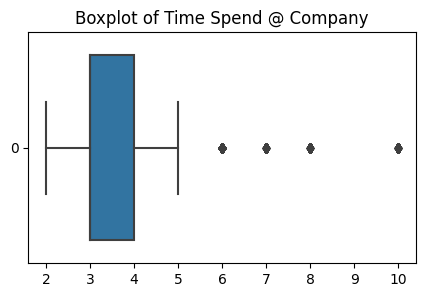

In [18]:
### Creating a boxplot to visualize distribution of `tenure` and detect any outliers

plt.figure(figsize = (5,3))
fig = sns.boxplot(df['time_spend_company'], orient = 'h')
fig.set_title('Boxplot of Time Spend @ Company')
plt.show()

In [19]:
### Determine the number of rows containing outliers

# Calculating percentiles
percentile25 = df['time_spend_company'].quantile(0.25)
percentile75 = df['time_spend_company'].quantile(0.75)

# Calculating inter quartile range
iqr = percentile75 - percentile25

# Calculating lower and upper limits
lower_limit = percentile25 - 1.5 * iqr
upper_limit = percentile75 + 1.5 * iqr

In [20]:
### Checking the number of outliers in the time spend at company feature
outliers_M = df[df['time_spend_company'] > upper_limit]
outliers_M.shape[0]

824

Checking outliers in the whole data frame

In [21]:
subset_df = df.drop(['time_spend_company', 'department', 'salary'], axis = 1)

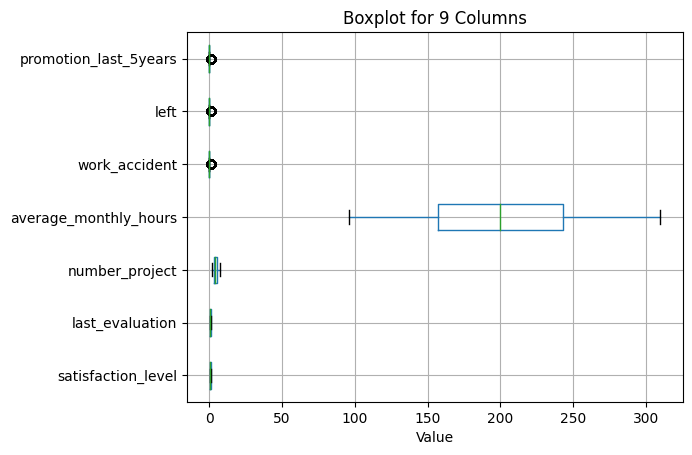

In [22]:
### Creating a boxplot to visualize distribution of `tenure` and detect any outliers

# Create a boxplot for all 9 columns
subset_df.boxplot(column=list(subset_df.columns), vert=False)
plt.title('Boxplot for 9 Columns')
plt.xlabel('Value')
plt.show()


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



**Initial insights from EDA:**

1. **Relationships Between Variables:**
   - "Satisfaction_level" and "time_spend_company" exhibit a negative relationship, suggesting that longer tenure may lead to lower satisfaction.
   - The newly engineered feature "work_load" is negatively correlated with "time_spend_company," possibly indicating increased efficiency over time.
   - Notably, a high workload in the first 3 years led to more employees leaving.

2. **Data Distributions:**
   - The data distributions are not normal, indicating skewness.

3. **Data Transformations:**
   - I created the "work_load" feature to proxy for workload due to high accidents in the sales department, aiming to improve interpretability.
   - "Number_project" and "average_monthly_hours" gained clarity through this feature.

4. **Purposes of EDA:**
   - EDA aids in data discovery, cleaning, and model selection, essential for project goals.

5. **Resources Used:**
   - Operational Python packages, including numpy and pandas, were pivotal. Visualization relied on matplotlib and seaborn.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [23]:
### Checking the unique values in the target variable

df['left'].unique()

array([1, 0])

In [24]:
### Get the number of people who left vs. stayed

df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [25]:
# Get percentages of people who left vs. stayed

df['left'].value_counts(normalize = True)

0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

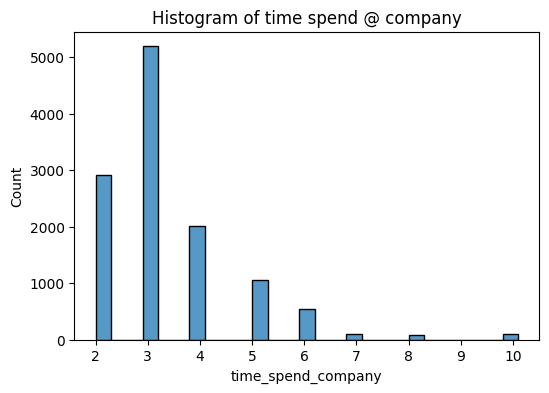

In [26]:
# Hstogram of time spend @ company

plt.figure(figsize = (6,4))
fig = sns.histplot(df['time_spend_company'], binwidth = 0.3)
fig.set_title('Histogram of time spend @ company')
plt.show()

- Close to 3000 employees would spend at most 2 years working at Salifort.
- Close to half of the employees tend to spend at most 3 years at the company.
- Less than a thousand employees wouldn't want to spend more than 6 years at the company

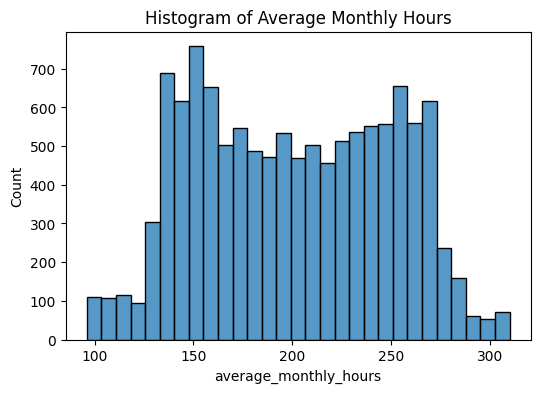

In [27]:
### Plot for average monthly working hours

plt.figure(figsize = (6,4))
fig = sns.histplot(df['average_monthly_hours']);
fig.set_title('Histogram of Average Monthly Hours')
plt.show()

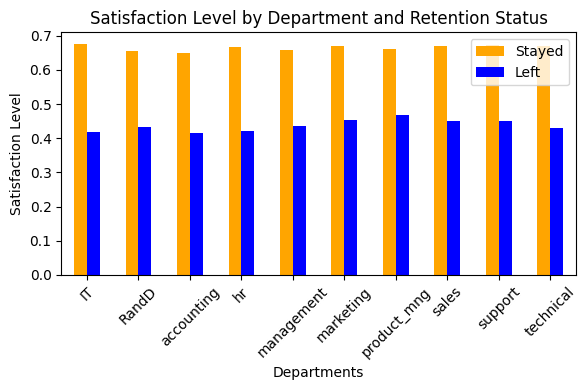

In [28]:
### Create a plot as needed

# Grouping satisfaction level by turnover and department
satifaction_by_department = df.groupby(['department', 'left'])['satisfaction_level'].mean().unstack()
satifaction_by_department.plot(kind = 'bar', figsize = (6,4), color = ['orange', 'blue'])

# Customize the plot
plt.xlabel('Departments')
plt.ylabel('Satisfaction Level')
plt.title('Satisfaction Level by Department and Retention Status')
plt.xticks(rotation= 45)  # Rotate x-axis labels for better readability
plt.legend(['Stayed', 'Left'])

# Show the plot
plt.tight_layout()
plt.show()

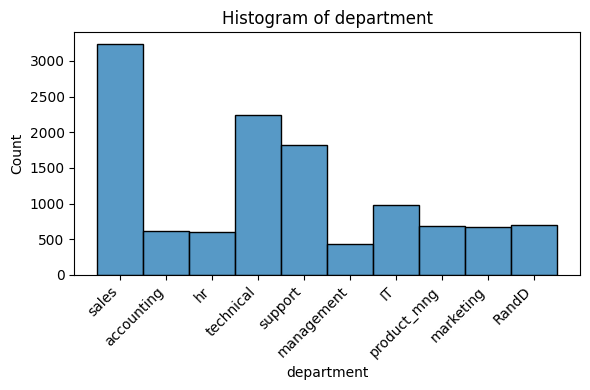

In [29]:
# Get unique department labels
labels = df['department'].unique()

# Create a Seaborn histogram plot
plt.figure(figsize = (6,4))
fig = sns.histplot(df['department'], discrete=True)

# Set the title of the plot
fig.set_title('Histogram of department')

# Rotate and center x-axis tick labels
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

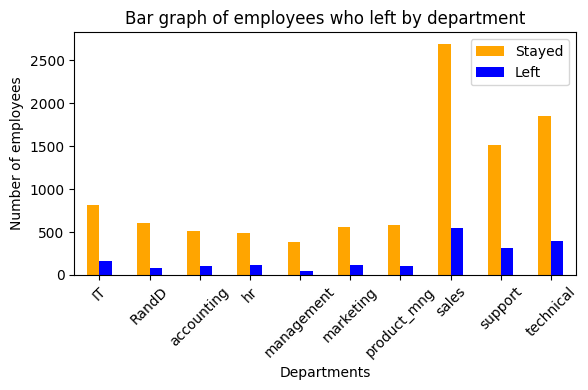

In [30]:
# Creating a bar graph for employees who left by department

# Grouping counts of those who left by department
left_by_department = df.groupby('department')['left'].value_counts().unstack()

# plotting the graph
left_by_department.plot(kind = 'bar', figsize = (6,4), color = ['orange', 'blue'])


# Customizing the plot
plt.xlabel('Departments')
plt.ylabel('Number of employees')
plt.title('Bar graph of employees who left by department')
plt.xticks(rotation= 45)
plt.legend(['Stayed', 'Left'])

# Showing the plot
plt.tight_layout()
plt.show()

- The sales department has a higher employee turnover rate, being the department with highest number of employees at Salifort.
- The technical department follows after sales and last but not least is the support department.
- Interestingly, the management department has lowest turnover and we would expect such to be the case.

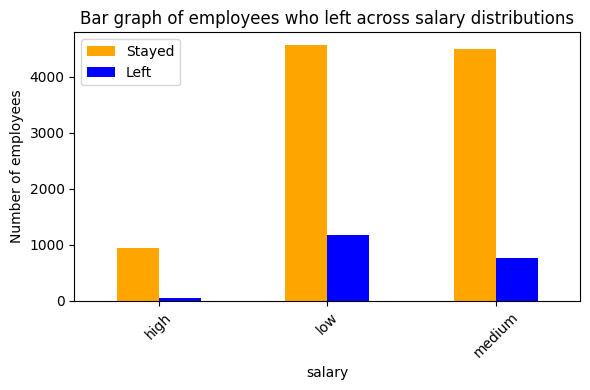

In [31]:


### Creating a bar graph for employees who left by department

# Grouping counts of those who left by department
left_by_department = df.groupby('salary')['left'].value_counts().unstack()

# plotting the graph
left_by_department.plot(kind = 'bar', figsize = (6,4), color = ['orange', 'blue'])


# Customizing the plot
plt.xlabel('salary')
plt.ylabel('Number of employees')
plt.title('Bar graph of employees who left across salary distributions')
plt.xticks(rotation= 45)
plt.legend(['Stayed', 'Left'])

# Showing the plot
plt.tight_layout()
plt.show()

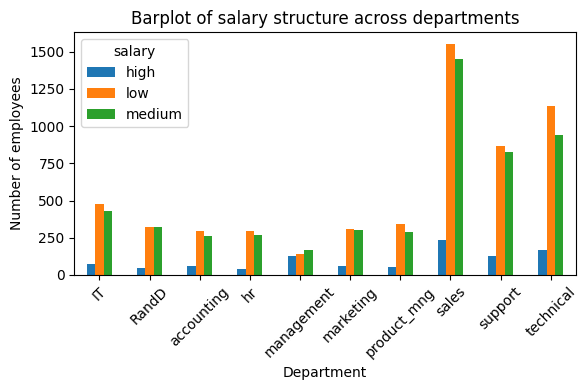

In [32]:
### Grouping salary by department
salary_by_department = df.groupby('department')['salary'].value_counts().unstack()
salary_by_department.plot(kind = 'bar', figsize = (6,4));

# Customizing the plot
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.title('Barplot of salary structure across departments')
plt.xticks(rotation= 45)


# Showing the plot
plt.tight_layout()
plt.show()


As expectated, employees with low salaries tend to leave more compared to medium and high earning employees. Probably in search for better salaries elsewhere and thus a hypthesis that needs to be proved too.

In [33]:
### Grouping promotion in the last 5 years by department
promotion_by_department = df.groupby('department')['promotion_last_5years'].sum().reset_index()
left_by_department = df.groupby('department')['left'].sum().reset_index()
promotion_by_department

,department,promotion_last_5years
0,IT,2
1,RandD,21
2,accounting,10
3,hr,11
4,management,36
5,marketing,27
6,product_mng,0
7,sales,58
8,support,16
9,technical,22


1991 is the same figure we obtain in our previous section of this notebook representing the number of employees who left

In [34]:

# Min-max scaling
max_left = left_by_department['left'].max()
max_promotion = promotion_by_department['promotion_last_5years'].max()

left_scaled = left_by_department['left'] / max_left
promotion_scaled = promotion_by_department['promotion_last_5years'] / max_promotion

# Combining the two dataframes
combined_df = pd.DataFrame({
    'department': left_by_department['department'],
    'promotion_scaled': promotion_scaled,
    'left_scaled': left_scaled
})

To obtain a some comparable values, we performed scaling on the new dataframe of the number of promotions and employees who left by department.

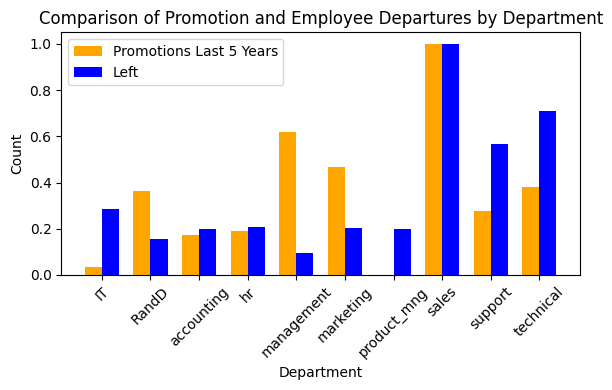

In [35]:
###Plotting a comparison of promotion and employee departures by department
plt.figure(figsize=(6, 4))
width = 0.35
x = range(len(combined_df['department']))

plt.bar(x, combined_df['promotion_scaled'], width, label='Promotions Last 5 Years', color='orange')
plt.bar([i + width for i in x], combined_df['left_scaled'], width, label='Left', color='blue')

plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Comparison of Promotion and Employee Departures by Department')
plt.xticks([i + width/2 for i in x], combined_df['department'], rotation = 45)
plt.legend()

plt.tight_layout()
plt.show()

The provides some interesting insights into employee turnover by department against the number of promotions that occured within the respective departments.

- The sales department shows that on a level scale, the number of promotions is fairly equal to the number of employee turnover and this should raise questions as to why employees choose to leave in a department that seems to recognize work effort.
- There seems to be no promotions in the department of product management and surprisingly the number of employees who left is lower compared to departments such as sales, support, technical and IT. The numbers are fairly equal to HR and Accounting departments which have fairly number of promotions compared to the number of employee turnover.
- Lastly, it wouldn't come as a surprise that with high promotions and high salaries as discovered in the previous section, the management department has low employee turnover.


In [36]:
### Group work accidents by department

accidents_by_department = df.groupby('department')['work_accident'].sum().reset_index()
accidents_by_department

,department,work_accident
0,IT,139
1,RandD,119
2,accounting,87
3,hr,80
4,management,72
5,marketing,108
6,product_mng,109
7,sales,498
8,support,299
9,technical,339


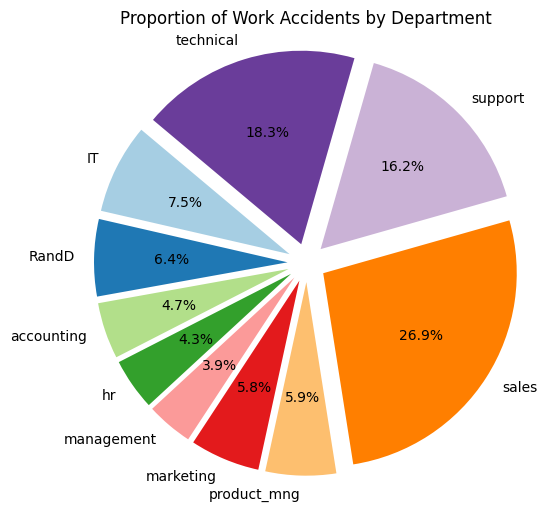

In [37]:
### Plot of work accidents by department

plt.figure(figsize = (6,6))
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(x = accidents_by_department['work_accident'],
        data = accidents_by_department,
        labels = accidents_by_department['department'],
        autopct='%1.1f%%',
        startangle=140,
        explode = explode,
        colors=plt.cm.Paired(range(len(df))))

# Equal aspect ratio ensures that pie is drawn as a circle.

plt.axis('equal')
plt.title('Proportion of Work Accidents by Department')

plt.show()

"The pie chart illustrating the proportion of work accidents by department offers intriguing insights into the occurrence of accidents within the company.

1. The sales department stands out, accounting for 26.9% of all reported accidents. This raises questions about whether accidents contribute significantly to the high turnover rate in this department. However, to gain a deeper understanding, leadership should investigate the nature and causes of these accidents. While accidents might be expected in departments like R&D and technical, the elevated rate in sales warrants further examination and may indeed be a key factor in high turnover.

2. Following sales, the technical and support departments have the next highest proportions of accidents, with 18.3% and 16.2%, respectively, of the total recorded accidents in the company."

In [38]:
#Let's create a category that splits satisfaction_level into 2 using 0.5 a our threshold.
#Any satisfaction_level below or equal to 0.5 may be considered unsatisfied whilst any value above indicated satisfication

condition = df['satisfaction_level'] > 0.5
satisfied = 'satisfied'
dissatisfied = 'dissatisfied'
df['satisfaction_category'] = np.where(condition, satisfied, dissatisfied)
df[['satisfaction_level', 'satisfaction_category']].head(3)

,satisfaction_level,satisfaction_category
0,0.38,dissatisfied
1,0.80,satisfied
2,0.11,dissatisfied


In [39]:
#Let's calculate the percentage of satisfied vs dissatisfied
df['satisfaction_category'].value_counts(normalize = True)

satisfied       0.717788
dissatisfied    0.282212
Name: satisfaction_category, dtype: float64

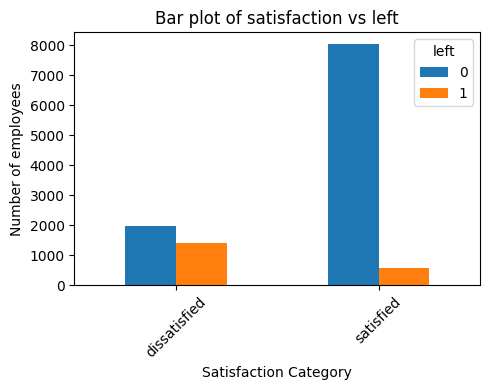

In [40]:
### Group satisfaction by turnover
satisfaction_turnover = df.groupby('satisfaction_category')['left'].value_counts().unstack()
satisfaction_turnover.plot(kind = 'bar', figsize = (5,4));

# 3. Customizing the plot
plt.xlabel('Satisfaction Category')
plt.ylabel('Number of employees')
plt.title('Bar plot of satisfaction vs left')
plt.xticks(rotation= 45)


# 4. Showing the plot
plt.tight_layout()
plt.show()


- Among employees who were satisfied, a small number chose to leave the company, possibly due to factors like reaching retirement age. To explore this further, the company could categorize departures by age groups for a more accurate understanding. However, this insight is subjective and would benefit from additional data to make it more objective.

- Surprisingly, among dissatisfied employees, a slightly greater number decided to stay. This suggests there might be specific reasons that retain these employees. However, addressing dissatisfaction is crucial for productivity, reducing any other costs and reducing accidents. Identifying the factors keeping dissatisfied employees can provide short-term retention benefits while the company explores broader improvements.

In [41]:
### Group Work Accident and employee turnover (left) by Satisfaction category
sad = df.groupby(['satisfaction_category'])['work_accident', 'left'].sum().reset_index()

<ipython-input-41-5657be8314fe>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sad = df.groupby(['satisfaction_category'])['work_accident', 'left'].sum().reset_index()


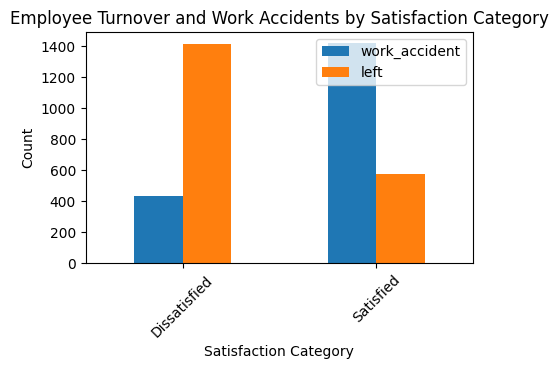

In [42]:
### Employee Turnover and Work Accidents by Satisfaction Category
ax = sad.plot(kind='bar', figsize = (5,3))

# Set the x-axis tick labels
ax.set_xticklabels(['Dissatisfied', 'Satisfied'], rotation=45)

# Add labels and a title
plt.xlabel('Satisfaction Category')
plt.ylabel('Count')
plt.title('Employee Turnover and Work Accidents by Satisfaction Category')

# Show the plot
plt.show()

**Dissatisfied Employees:** Despite being dissatisfied, only more than 400 accidents occurred among this group. Additionally, a substantial number, close to 1400, chose to leave the company. This suggests that dissatisfaction may be related to accidents, but dissatisfaction could be one of the major factors contributing to employee turnover.

**Satisfied Employees:** Surprisingly, among the satisfied employees, there were even more accidents recorded, which is unexpected. Moreover, the number of employees who left was slightly higher than the number of dissatisfied employees who left. This finding is indeed peculiar and warrants further investigation. It might indicate that other factors are at play in the decision to leave or stay for satisfied employees, and it's essential to understand these factors better.

These results highlight the complexity of the relationship between employee satisfaction, work accidents, and turnover. They suggest that there may be additional factors influencing employees' decisions to leave or stay beyond just satisfaction or accidents, and further analysis is needed to uncover these factors.

## Feature Engineering

In [43]:
### Let's create a feature that capture workload

df['work_load'] = (df['number_project']/df['time_spend_company'])*df['average_monthly_hours']

In [44]:
### Descriptive stats of workload

df['work_load'].describe()

count    11991.000000
mean       254.542889
std        126.744292
min         23.400000
25%        161.250000
50%        235.000000
75%        334.500000
max        849.000000
Name: work_load, dtype: float64

Since one of the variables use to feature engineer the new feature contained oultiers, we need to deal with outliers in this new variable as well.


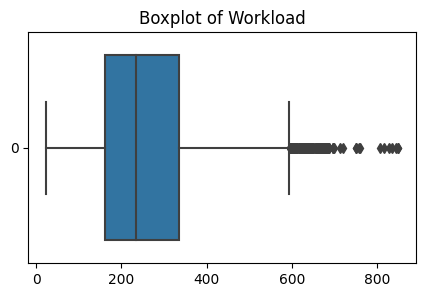

In [45]:
### Box plot of workload
plt.figure(figsize = (5,3))
sns.boxplot(df.work_load, orient = 'h')
plt.title('Boxplot of Workload')
plt.show()

In [46]:
### Calculating the number of outliers in workload

# Calculating the 25th and 75th percentile
wlpercentile25 = df.work_load.quantile(0.25)
wlpercentile75 = df.work_load.quantile(0.75)

# Calculating the interquartile range
iqr = wlpercentile75 - wlpercentile25

# Calculating the lower and upper limits
lower_limit_wl = wlpercentile25 - iqr*1.5
upper_limit_wl = wlpercentile75 + iqr*1.5

# Number of outliers
outlier_work_load = df[df['work_load'] > upper_limit_wl].shape[0]
outlier_work_load

168

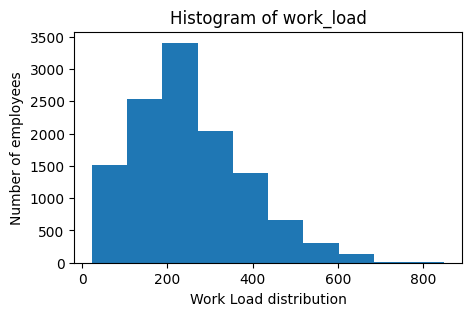

In [47]:
### Distribution of workload
plt.figure(figsize = (5,3))
plt.hist(df['work_load'])
plt.title('Histogram of work_load')
plt.xlabel('Work Load distribution')
plt.ylabel('Number of employees')

plt.show()

Below is a table and bar plot of the workload in each department in absolute terms

In [48]:
### Grouping workload by department
work_load_depart = df.groupby('department')['work_load'].sum().reset_index()
sorted_workload_depart = work_load_depart.sort_values(by = 'work_load', ascending = False)
sorted_workload_depart

,department,work_load
7,sales,816643.823810
9,technical,583778.634524
8,support,474683.816667
0,IT,250094.645238
1,RandD,177958.850000
6,product_mng,172141.419048
5,marketing,164749.105952
2,accounting,156964.908333
3,hr,150558.766667
4,management,104649.814286


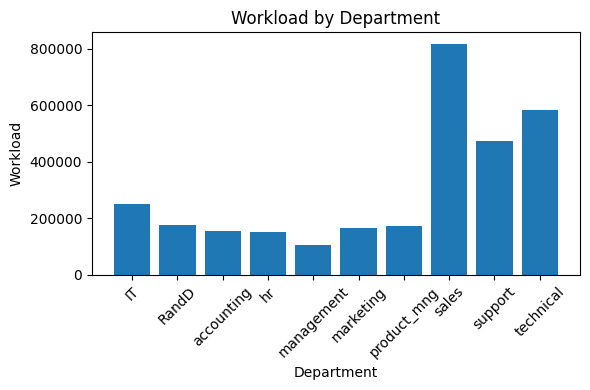

In [49]:
### A comparison by department
plt.figure(figsize=(6, 4))
plt.bar(work_load_depart['department'], work_load_depart['work_load'])

#Customizing the plot
plt.xlabel('Department')
plt.ylabel('Workload')
plt.title('Workload by Department')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [50]:
### Average workload per worker in each department
mean_worker_load_depart = df.groupby('department')['work_load'].mean().reset_index()
sorted_workload_perworker_depart = mean_worker_load_depart.sort_values(by = 'work_load', ascending = False)
sorted_workload_perworker_depart

,department,work_load
8,support,260.672057
9,technical,260.150907
1,RandD,256.424856
0,IT,256.244514
2,accounting,252.761527
7,sales,252.128380
6,product_mng,250.935013
3,hr,250.513755
5,marketing,244.798077
4,management,240.022510


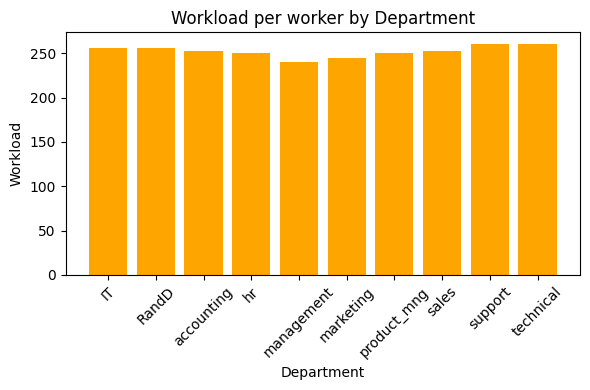

In [51]:
### Workload per worker by Department
plt.figure(figsize=(6,4))
plt.bar(mean_worker_load_depart['department'],
        mean_worker_load_depart['work_load'],
        color = 'orange')

#Customizing the plot
plt.xlabel('Department')
plt.ylabel('Workload')
plt.title('Workload per worker by Department')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

- The absolute workload in the sales department is high, which suggests that this department employs a significant number of staff. This could be a factor contributing to the high workload in the department.

- Despite the high absolute workload in the sales department, the average workload per worker is relatively similar across all departments. This indicates that Salifort seems to distribute the workload uniformly among its employees, regardless of the department they work in.

- The uniform workload distribution can be seen as a positive company ethic, demonstrating fairness in terms of work contribution. However, it also raises the possibility that some employees may feel undervalued, especially if they believe that their effort is not equally rewarded in terms of salary. This could be a hidden factor contributing to employee turnover.

In [52]:
turnover_load_satisfaction = df.groupby(['satisfaction_category', 'work_accident', 'left'])['work_load'].mean().reset_index()
tls = turnover_load_satisfaction

In [53]:
tls.sort_values(by = 'work_load', ascending = False)

,satisfaction_category,work_accident,left,work_load
4,satisfied,0,0,269.789750
6,satisfied,1,0,268.651222
7,satisfied,1,1,229.193333
0,dissatisfied,0,0,228.075312
5,satisfied,0,1,224.416118
1,dissatisfied,0,1,221.688972
2,dissatisfied,1,0,217.850942
3,dissatisfied,1,1,203.239778


- **Satisfied Employees with No Accidents or Turnover:** Among satisfied employees who neither experienced accidents nor left the company, their average workload stands at a remarkable 269.789750. This observation raises intriguing possibilities. One could conjecture that contented employees who haven't faced accidents may tend to overlook workload concerns and opt to remain with the organization. To delve deeper into this hypothesis, it would be prudent to examine how this pattern relates to different salary categories, as higher salaries often inspire greater work commitment.


- **Dissatisfied Employees with Accidents and Turnover:** It is indeed surprising that dissatisfied employees who had both accidents and ultimately left Salifort exhibited the lowest average workload, registering at 203.239778. This finding warrants special scrutiny, as it hints at multifaceted factors at play. The presence of accidents appears to have influenced some employees' decisions to depart, even when the workload was comparatively light on average. This underscores the intricate relationship between job satisfaction, safety concerns following accidents, and the ultimate choice to leave employment.

In [54]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,satisfaction_category,work_load
0,0.38,0.53,2,157,3,0,1,0,sales,low,dissatisfied,104.666667
1,0.80,0.86,5,262,6,0,1,0,sales,medium,satisfied,218.333333
2,0.11,0.88,7,272,4,0,1,0,sales,medium,dissatisfied,476.000000
3,0.72,0.87,5,223,5,0,1,0,sales,low,satisfied,223.000000
4,0.37,0.52,2,159,3,0,1,0,sales,low,dissatisfied,106.000000


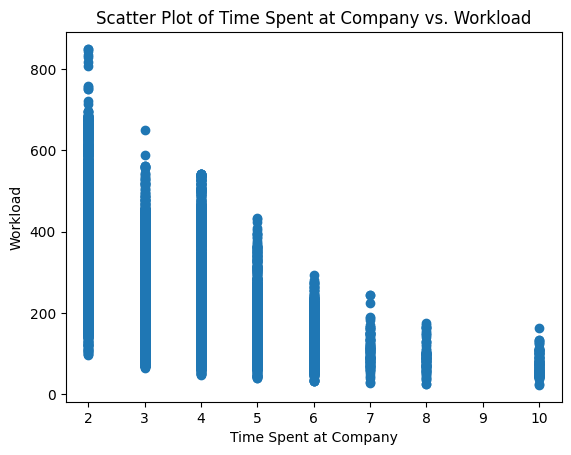

In [55]:
### Scatter plot of time spent at company vs workload
plt.scatter(df['time_spend_company'], df['work_load'])
plt.xlabel('Time Spent at Company')
plt.ylabel('Workload')
plt.title('Scatter Plot of Time Spent at Company vs. Workload')
plt.show()

In [56]:
df.groupby(['time_spend_company'])['left'].value_counts().unstack()

left,0,1
time_spend_company,,
2,2879.0,31.0
3,4316.0,874.0
4,1510.0,495.0
5,580.0,482.0
6,433.0,109.0
7,94.0,NaN
8,81.0,NaN
10,107.0,NaN


<ipython-input-57-f3fee615fa77>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


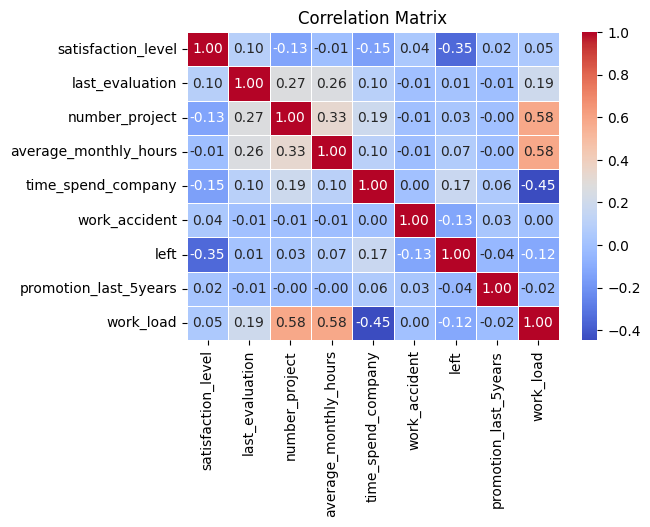

In [57]:
# dfco = df.drop(['left'], axis =1)
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5);
plt.title("Correlation Matrix")
plt.show()

**Workload and Time Spent at Company:** A compelling observation emerges from the scatter plot of time spent at the company versus workload. It indicates a gradual decline in workload as employees spend more time with the company. This trend may be attributed to employees becoming more efficient in their roles or improved work distribution strategies over time.

**Early Employee Turnover:** Notably, a substantial number of employees leave the company within the first three years of their tenure. This group warrants special attention as they appear more susceptible to turnover. Potential factors contributing to this turnover could include high workload and other challenges faced by newcomers. Therefore, focusing on this demographic with incentives and support programs could improve retention.

**Correlation Between Workload and Early Turnover:** The correlation between high workload and increased turnover during the initial years of employment is a significant finding. It suggests that newly hired employees might feel overwhelmed by their workload, which in turn elevates the likelihood of them leaving the company. This underscores the importance of effective onboarding and support initiatives to help newcomers adjust to their roles more smoothly.

# PACE WORKFLOW: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


In [58]:
# Packages for Logistic Regression & Confusion Matrix
### YOUR CODE HERE ###
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score

🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a classification problem which is predicting whether an employee will leave a company based on different explanatory variables.

### Identify the types of models most appropriate for this task.

We will use a logistic regression and or decision trees and or random forest models

### Modeling

Add as many cells as you need to conduct the modeling process.

We will first deal with some outliers in our model on two features; `time_spend_company` and `work_load`

In [59]:
### YOUR CODE HERE ###
outliers_tsc = df['time_spend_company'] > upper_limit
a = upper_limit
b = df['time_spend_company']
df['time_spend_company'] = np.where(outliers_tsc, a, b)

In [60]:
outliers_wl = df['work_load'] > upper_limit_wl
c =upper_limit_wl
d = df['work_load']
df['work_load'] = np.where(outliers_wl, c, d)

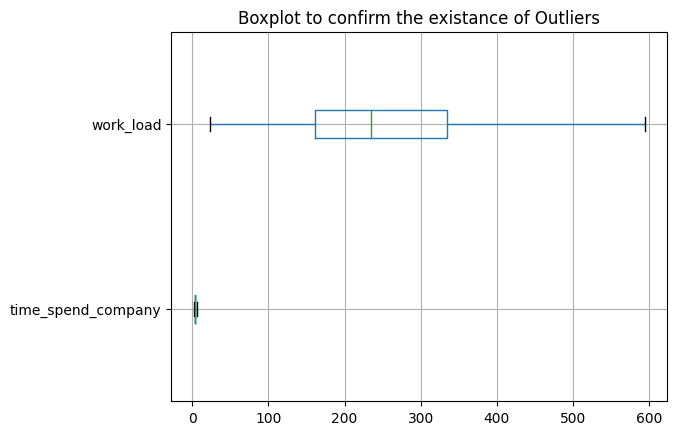

In [61]:
test_outliers = df[['time_spend_company', 'work_load']]
test_outliers.boxplot(column = list(test_outliers.columns), vert = False)
plt.title('Boxplot to confirm the existance of Outliers')
plt.show()

### Label encoding

In [62]:
encoded_depart = pd.get_dummies(df, columns = ['department'], drop_first = False)

In [63]:
encoded_satif = pd.get_dummies(encoded_depart, columns = ['satisfaction_category'], drop_first = False)

In [64]:
label_encoder = LabelEncoder()
encoded_satif['salary'] = label_encoder.fit_transform(df['salary'])

In [65]:
encoded_satif.salary.head(5)

0    1
1    2
2    2
3    1
4    1
Name: salary, dtype: int64

In [66]:
encoded_df = encoded_satif.copy()

In [67]:
encoded_df.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,work_load,...,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,satisfaction_category_dissatisfied,satisfaction_category_satisfied
0,0.38,0.53,2,157,3.0,0,1,0,1,104.666667,...,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,5.5,0,1,0,2,218.333333,...,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4.0,0,1,0,2,476.000000,...,0,0,0,0,0,1,0,0,1,0


### Data Standardization

In [68]:
scaler = MinMaxScaler()

In [69]:
scaler.fit(encoded_df)

MinMaxScaler()

In [70]:
scaled_data = scaler.transform(encoded_df)

In [71]:
scaled_df = pd.DataFrame(scaled_data, columns=encoded_df.columns)

In [72]:
scaled_df.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,work_load,...,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,satisfaction_category_dissatisfied,satisfaction_category_satisfied
0,0.318681,0.265625,0.0,0.285047,0.285714,0.0,1.0,0.0,0.5,0.142330,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,1.000000,0.0,1.0,0.0,1.0,0.341404,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.571429,0.0,1.0,0.0,1.0,0.792679,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Checking data balance (Y-Target)

In [73]:
scaled_df.left.value_counts(normalize = True)

0.0    0.833959
1.0    0.166041
Name: left, dtype: float64

### Data rebalancing

In [74]:
# pip install imblearn

In [75]:
from imblearn.over_sampling import RandomOverSampler

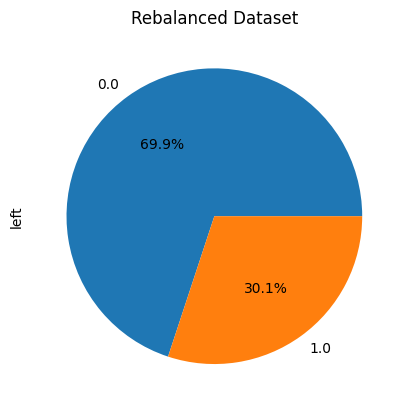

In [76]:
# Specify the desired sampling ratio (e.g., 0.5 to make the minority class half as large as the majority class)
desired_ratio = 0.43

# Instantiate the RandomOverSampler with the desired sampling ratio
oversampler = RandomOverSampler(sampling_strategy=desired_ratio, random_state=42)

# Separate features and target variable
X = scaled_df.drop('left', axis=1)
y = scaled_df['left']

# Fit and transform the dataset to oversample the minority class
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with the oversampled data
oversampled_data = pd.DataFrame(X_resampled, columns=X.columns)
oversampled_data['left'] = y_resampled

y_resampled.value_counts().plot.pie(autopct = '%1.1f%%')
plt.title("Rebalanced Dataset")
plt.show()

In [77]:
oversampled_data.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary,work_load,department_IT,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,satisfaction_category_dissatisfied,satisfaction_category_satisfied,left
0,0.318681,0.265625,0.0,0.285047,0.285714,0.0,0.0,0.5,0.142330,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.780220,0.781250,0.6,0.775701,1.000000,0.0,0.0,1.0,0.341404,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.571429,0.0,0.0,1.0,0.792679,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [78]:
model_data = oversampled_data

In [79]:
model_data.shape

(14300, 22)

In [80]:
model_data.left.value_counts(normalize = True)

0.0    0.699301
1.0    0.300699
Name: left, dtype: float64

### Splitting data: Training and Testing

In [81]:
# Isolating the target variable from the explanatory variables and vice versa.
X = model_data.drop(['left'], axis = 1)
y = model_data['left']

In [82]:
# Creating our train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, stratify = y_train, random_state = 42)

### Logistic model building

In [83]:
### Instantiting the logistic regression model

log_model_cl = LogisticRegression(random_state = 42)

### Creating a set of parameters to search over

In [84]:
### Sets of paramaters to search over in gridsearch

log_params = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 300, 1000, 10000, 100000]
}

scoring = {'f1', 'accuracy', 'precision', 'recall'}

### Searching for the best parameters using GridSearch Cross Validation

In [85]:
### Searching for the best parameters
log_model_cv= GridSearchCV(log_model_cl, log_params, scoring = scoring, cv = 5, refit = 'f1', error_score = 'raise')

### Fitting the model

In [86]:
log_model_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'max_iter': [100, 300, 1000, 10000, 100000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             refit='f1', scoring={'accuracy', 'precision', 'recall', 'f1'})

### Collecting the best parameters

In [87]:
lr_best_params = log_model_cv.best_params_
lr_best_params

{'C': 10.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

### Instantiating the best model

In [88]:
log_model = log_model_cv.best_estimator_
log_model

LogisticRegression(C=10.0, random_state=42, solver='liblinear')

### Collecting the coefficients of log regression model variables

In [89]:
log_model.coef_

array([[ 1.368582  ,  1.09277047, -0.01160471,  2.59921563,  1.53194502,
        -1.36580493, -2.04182767,  0.09995564, -2.74961215, -0.29261911,
        -0.45910565, -0.11227912, -0.00968455, -0.36864528, -0.09931231,
        -0.26221496, -0.10624963, -0.06322743, -0.05949177,  0.78389854,
        -2.61672836]])


**Let us cross match each coeficient to its correspending feature**

In [90]:
### YOUR CODE HERE ###
# Assuming 'model' is your logistic regression model
# Replace 'model' with your actual model name

# Get the coefficients of the model
coefficients = log_model.coef_[0]

# Get the column names from your DataFrame
column_names = X.columns

# Create a Series with column names as the index and coefficients as values
coefficients_series = pd.Series(coefficients, index=column_names)

# Set the name for the index (the column containing different features)
coefficients_series.index.name = 'Feature'

# Display the coefficients Series
coefficient_tab = pd.DataFrame(coefficients_series, columns = ['Coefficient'])
coeff_table = coefficient_tab.reset_index()

In [91]:
coeff_table['Exp_coefficient'] = coeff_table['Coefficient'].apply(lambda x: np.exp(x))
coeff_table

,Feature,Coefficient,Exp_coefficient
0,satisfaction_level,1.368582,3.929774
1,last_evaluation,1.092770,2.982526
2,number_project,-0.011605,0.988462
3,average_monthly_hours,2.599216,13.453182
4,time_spend_company,1.531945,4.627168
5,work_accident,-1.365805,0.255175
6,promotion_last_5years,-2.041828,0.129791
7,salary,0.099956,1.105122
8,work_load,-2.749612,0.063953
9,department_IT,-0.292619,0.746306


In [92]:
print("The intecept of this model is :", log_model.intercept_)

The intecept of this model is : [-1.83282982]


In [93]:
training_prob = log_model.predict_proba(X_train)
training_prob

array([[0.38870715, 0.61129285],
       [0.9833273 , 0.0166727 ],
       [0.61324737, 0.38675263],
       ...,
       [0.37014407, 0.62985593],
       [0.82448713, 0.17551287],
       [0.93310436, 0.06689564]])

Let us check the linearity assumption between the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable

In [94]:
# lest's copy the `X_train` dataframe and assign to `logit_data`
logit_df = X_train.copy()

In [95]:
# 2. Create a new `logit` column in the `logit_data` df
### YOUR CODE HERE ###
logit_df['logit'] = np.log(training_prob[:, 1] / training_prob[:, 0])
logit_df.head(3)

Feature,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary,work_load,department_IT,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,satisfaction_category_dissatisfied,satisfaction_category_satisfied,logit
12815,0.000000,0.640625,0.8,0.691589,0.571429,0.0,0.0,0.5,0.600026,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.452750
7522,0.802198,0.250000,0.6,0.640187,0.000000,0.0,0.0,1.0,0.979202,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-4.077169
2066,0.351648,0.171875,0.4,0.037383,0.285714,0.0,0.0,0.5,0.201877,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.460983


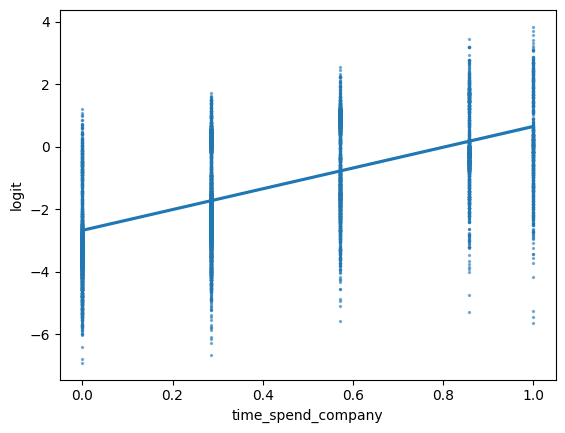

In [96]:
# Plot regplot of `activity_days` log-odds
### YOUR CODE HERE ###
sns.regplot(x = 'time_spend_company', y = 'logit', data = logit_df, scatter_kws={'s': 2, 'alpha': 0.5});

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [97]:
### Predict the x values using the fitted model

left_pred = log_model.predict(X_test)

In [98]:
left_pred

array([0., 1., 0., ..., 0., 0., 0.])

**Helper function for score results:**

In [99]:
### Helper function to create a dataframe of metric scores

results = pd.DataFrame(columns = ['Model_Name', 'F1', 'Recall', 'Precsion', 'Accuracy'])

def make_results(model_name, model_object):
  '''
  Accepts as arguments a model name and a fit GriSearch model object.

  Returns a pandas df with F1, recall, precision, and accuaracy socres
  for the model with best mean F1 score across all validation folds.

  '''
  # Get all the results from the CV and put them i n a df
  cv_results = pd.DataFrame(model_object.cv_results_)

  # Isolate the row of the df with max(mean f1 score)
  best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

  #Extract accuracy, precision, recall, and f1 socre from the row
  f1 = best_estimator_results.mean_test_f1
  recall = best_estimator_results.mean_test_recall
  precision = best_estimator_results.mean_test_precision
  accuracy = best_estimator_results.mean_test_accuracy

  #Create table of results
  table = pd.DataFrame()
  table = table.append({'Model_Name': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precsion': precision,
                        'Accuracy': accuracy},
                       ignore_index = True
                       )
  return table

**Logistic regression matric scores**

In [100]:
### Obtaining the matric scores of the logistic regression model using the helper function

lr_scores = make_results('Logistic Regression', log_model_cv)
score_table = lr_scores
score_table

<ipython-input-99-ce36656b438b>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model_Name': model_name,


,Model_Name,F1,Recall,Precsion,Accuracy
0,Logistic Regression,0.681502,0.684961,0.678724,0.807552


**Creating a confusion matrix plot helper function**

In [101]:
### Confusion matrix plot helper function

def conf_matrix_plot(model, x_data, y_data):
  '''
  Accepts as argument model object, X data (test or validate), and y data (test or validate)
  Returns a plot of confusion matrix for predictions on y data.

  '''

  model_pred = model.predict(x_data)
  cm = confusion_matrix(y_data, model_pred, labels = model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                display_labels = model.classes_)


  disp.plot()
  plt.show()

### Logistic regression confusion matrix

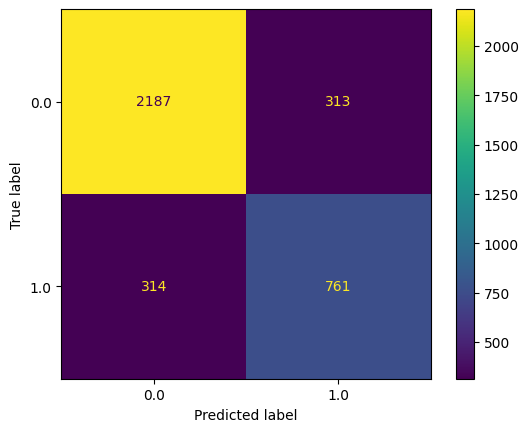

In [102]:
### Plotting the confusion matrix using our helper function

conf_matrix_plot(log_model, X_test, y_test)

### Summary of model results

**Model Scores:**

- Information from the model shows that our model has 80.75% accuracy rate. This means it is able to predict if an employee is likely to leave the company or stay with an 80.75% accuracy.
- The precision score is 67.87%. This metric measures proportion of positive predictions that were true positives. Out of all the employees the model classified as left, the model correctly predicted truly those who left by 67.87% success.
- The recall score is 68.49%. The metric is useful whe we want to measure the proportion of positives the model was able to identify correctly. Of all the employees the model identified as left and failed to identify as left, the model is able to identify with 68.49% success, the true employees who left.


**Error Matrix/Confusion Matrix**

- According to rule of thumb, a good model should be be able to classify more true positives and more true negatives than false positives and false negatives. The confusion matrix shows that if the model fails to correctly predict a false negative, the value is quite small with 314 against a value of 2187 of true negative. Even though it is quite a small number, the cost to the company is still large in terms of training. Again when it makes a wrong classification on false positive, the number is 313, whilst this number can compensate those of false negative, the company might spend unnecessary resources on employees who are not leaving but being classified wrongly by the model, hence improvements are need to improve the model.


**Coefficients:**

1. `satisfaction_level`: A positive coefficient of 1.368582 suggests that as an employee's satisfaction level increases, the likelihood of them staying in the company also increases.

2. `last_evaluation`: A positive coefficient of 1.092770 indicates that higher evaluations are associated with a higher probability of an employee staying.

3. `number_project`: A negative coefficient of -0.011605 suggests that as the number of projects an employee is working on increases, the probability of them leaving decreases.

4. `average_monthly_hours`: With a positive coefficient of 2.599216, more hours worked per month increase the likelihood of an employee staying.

5. `time_spend_company`: A positive coefficient of 1.531945 indicates that as the time an employee spends in the company increases, the probability of them staying also increases.

6. `work_accident`: A negative coefficient of -1.363805 suggests that employees who have had a work accident are less likely to leave.

7. `promotion_last_5years`: A negative coefficient of -2.041828 indicates that those who received a promotion in the last 5 years are less likely to leave.

8. `salary`: A positive coefficient of 0.099956 suggests that higher salaries are associated with a slightly higher probability of employees staying.

9. `work_load`: A negative coefficient of -2.749612 indicates that a heavier workload reduces the likelihood of an employee staying.

10. `department_...`: These coefficients represent different departments. Positive values suggest that being in that department increases the likelihood of staying, while negative values suggest the opposite.

11. `satisfaction_category_...`: These coefficients relate to satisfaction categories. Positive values indicate a higher likelihood of staying for employees categorized as "satisfied," and negative values for "dissatisfied."

These coefficients quantify the impact of various factors on employee retention. Positive coefficients increase the likelihood of staying, while negative coefficients decrease it.

### Conclusion, Recommendations, Next Steps

- To make more informed decisions, we need to improve the ability of the model to reduce both false negatives and false positives.
- A better approach would be to explore tree-based models that have the ability to range features so that they can provide the company with a better starting point of focus across all the features. Decision tree-based models like Random Forests and Gradient Boosting can often handle complex relationships in the data and provide better feature importance insights. They are also robust against outliers and multicollinearity, which can be limitations of logistic regression.
- Thus, the next step is to model a tree-based model.
- The predictive power of these model is so immense as compared to the current model.

# Building A Decision Tree Model

In [103]:
### Importing the necessary libraries for building a decision tree model

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

### Hyperparameter Tuning

In [104]:
### Defining the set of parameters to be tuned before training our model

tree_params = {'max_depth':[4,5,6,7,8,9,10,15,20,30,40,50],
               'min_samples_leaf':[2,4,6,8,10,20,50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

### Instantiating our model

In [105]:
### Model Instantiation

decision_model_clf = DecisionTreeClassifier(random_state = 42)

### Searching for the best parameters using GridSearch Cross Validation

In [106]:
### Searching the best parameters

decision_model_cv = GridSearchCV(decision_model_clf,
                           tree_params,
                           scoring = scoring,
                           cv = 5,
                           refit = 'f1')

### Fitting the model

In [107]:
### Fitting the model

decision_model_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 20, 50]},
             refit='f1', scoring={'accuracy', 'precision', 'recall', 'f1'})

In [108]:
### Collecting the best paramaters

best_decision_tree_params = decision_model_cv.best_params_

### Refitting the model using the best paramaters

In [109]:
### Instantiating the best model

decision_tree = DecisionTreeClassifier(**best_decision_tree_params, random_state = 42)

In [110]:
### Fitting the best model

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, random_state=42)

In [111]:
### Making predictions with the trained model on test data

decision_tree_predict = decision_tree.predict(X_test)

### Comparing the decision tree model metric score with those of logistic model

In [112]:
### Collecting scores of the decision tree using our previous helper function

dt_score = make_results('Decision Tree', decision_model_cv)

<ipython-input-99-ce36656b438b>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model_Name': model_name,


Presenting the scores of the first two models

In [113]:
### Creating a combined table of results for the logistic and decision tree models

scores_table2 = pd.concat([lr_scores, dt_score], axis = 0, ignore_index = True)
scores_table2

,Model_Name,F1,Recall,Precsion,Accuracy
0,Logistic Regression,0.681502,0.684961,0.678724,0.807552
1,Decision Tree,0.953410,0.927442,0.981079,0.972774


### Decision tree Confusion matrix

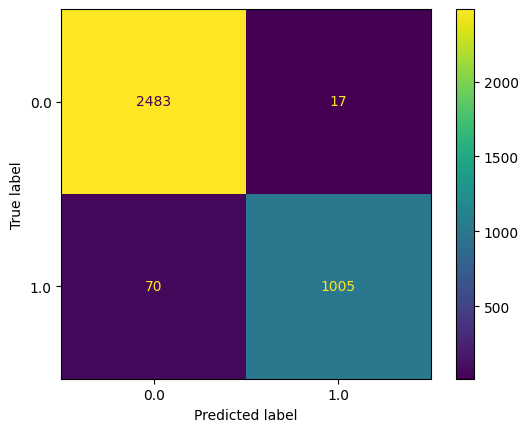

In [114]:
### Creating the confusion matrix using our helper function

conf_matrix_plot(decision_model_cv, X_test, y_test)

### Let's plot the tree

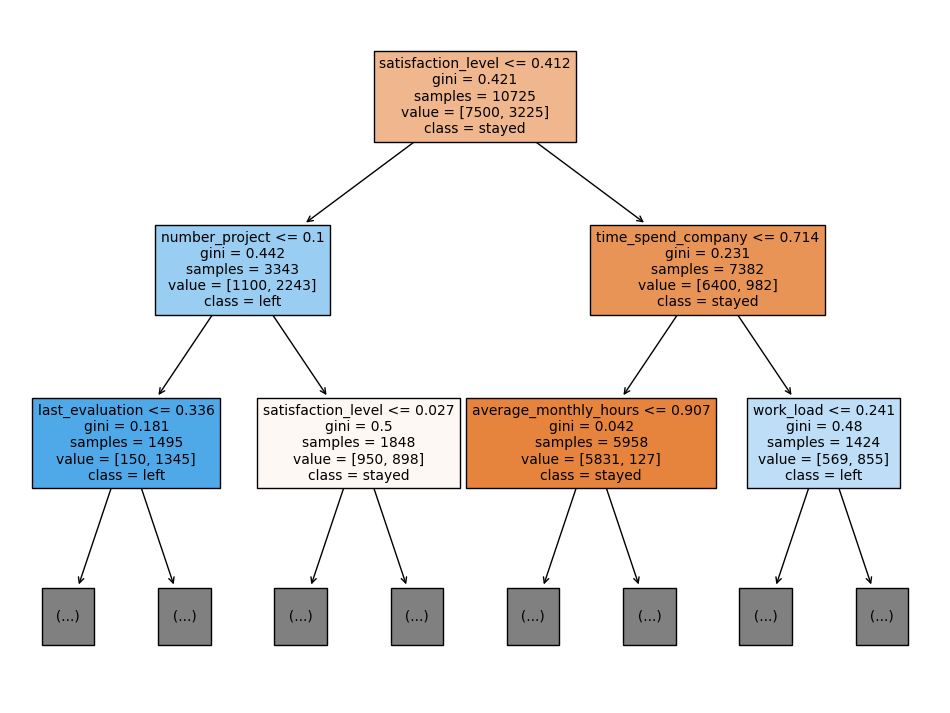

In [115]:
### Plotting our decision tree

plt.figure(figsize = (12,9))

plot_tree(decision_tree,
          max_depth = 2,
          fontsize =10,
          feature_names = X.columns,
          class_names = {0:'stayed', 1: 'left'},
          filled = True);

plt.show()

### Feature importance plot

In [116]:
### Identifying important features

feature_importance = decision_tree.feature_importances_

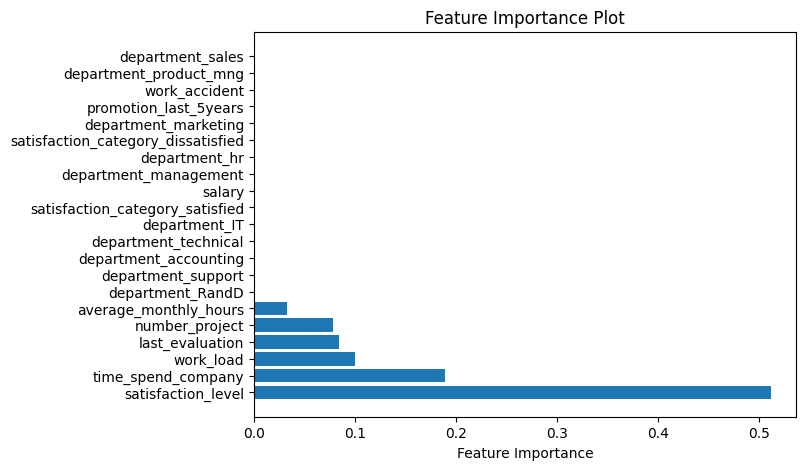

In [117]:
### Plotting the bar graph of feature importances:

feature_names = X_train.columns.tolist()
# Sort feature importances and corresponding feature names in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the sorted feature importances
plt.figure(figsize=(7, 5))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()

**Decision Tree**

The results from the decision tree analysis are impressive. Compared to the logistic model, the decision tree significantly outperforms it in all key areas.

- The decision tree achieves an impressive `F1 score` of `94.35%`, while the logistic model lags behind at `68.15%`. This substantial improvement in accuracy indicates that the decision tree is a better choice for this specific problem.

- `Accuracy` and `precision` are also noteworthy. The decision tree boasts an accuracy score of `97.27%` and a `precision score` of `98.10%`, demonstrating its ability to make accurate and precise predictions.

- Additionally, the decision tree's `recall score` of `92.74%` highlights its proficiency in identifying positive cases, which is crucial for this analysis.

- To ensure the model's reliability, grid search cross-validation was employed to guard against overfitting.

- Furthermore, when examining the confusion matrix, it's evident that the decision tree is more likely to make `type II errors (false negatives)` with just `70` incorrect predictions. In comparison, the logistic model would produce `314` wrong predictions in the same category, underscoring the decision tree's superior performance.

- Finally, the decision tree's feature importance plot identifies the top five factors that the company should focus on: satisfaction level, time spent at the company, workload, last evaluation, number of projects, and average monthly hours.

The decision tree analysis clearly demonstrates its effectiveness and superiority over the logistic model. Its high accuracy, precision, and recall, along with the ability to minimize critical prediction errors, make it a robust choice for decision-making. The feature importance insights provide valuable guidance for the company's strategic direction.  

There are several other model options with room for reliability such as the gradient boost and random forest. Those will be covered in other notebooks.